<a href="https://colab.research.google.com/github/tejaspradhan/Graph-Neural-Networks/blob/main/personality-analysis-project/Personality_Analysis_GNN_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk

In [4]:
df = pd.read_csv('mbti_1.csv')

In [5]:
# converting all to lower case 
df['posts'] = [i.lower() for i in df['posts']]

In [6]:
df['posts'].head()

0    'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1    'i'm finding the lack of me in these posts ver...
2    'good one  _____   https://www.youtube.com/wat...
3    'dear intp,   i enjoyed our conversation the o...
4    'you're fired.|||that's another silly misconce...
Name: posts, dtype: object

In [7]:
no_groups = df.groupby('type').count()

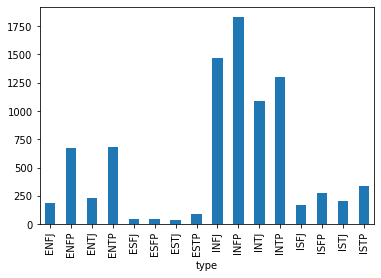

In [8]:
no_groups['posts'].plot(kind= 'bar')

In [9]:
df['Distinct Posts'] = [i.split('|||') for i in df['posts']]

In [10]:
df['Number of posts'] = df['Distinct Posts'].apply(len)
df.drop('Distinct Posts',inplace=True,axis=1)


In [11]:
df = df[df['Number of posts']==50]

In [12]:
#removing urls
df['Posts']= df['posts'].apply(lambda x: re.sub(r'https?:[?:A-Za-z0-9//_?.=/-]+', '', x.replace('|','')))
#keeping the end of strings
#removing punctuation marks
df['Posts']=df['Posts'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
#removing numbers and alphanumeric characters
df['Posts']=df['Posts'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))
# removing special symbols
df['Posts']=df['Posts'].apply(lambda x: re.sub(r'[0-9,."\'*.?/\()@#!$%&^+]', '', x))
# removing repetitive multiple letter words and too long or too short words
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))
#df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'\s[\s+]','',x))
df.drop('posts',inplace=True,axis=1)
df.to_csv('mbti_cleaned.csv')

In [13]:
data = pd.read_csv('mbti_cleaned.csv')
x = data['type']
data.drop(['Unnamed: 0', 'type'], axis = 1,inplace = True)
data['type'] = x
data

,Number of posts,Posts,type
0,50,intj moments sportscenter plays pra...,INFJ
1,50,finding lack these posts very alarmingsex...,ENTP
2,50,good course which know thats blessi...,INTP
3,50,dear intp enjoyed conversation other es...,INTJ
4,50,youre firedthats another silly misconception t...,ENTJ
...,...,...,...
7582,50,just because always think cats doms some...,ISFP
7583,50,soif this thread already exists someplace else...,ENFP
7584,50,many questions when these things would ta...,INTP
7585,50,very conflicted right when comes wanting ...,INFP
